In [ ]:
!gdown 1Lyrc_wzoKBetbToc2-FUlEot43vV-Aw0

Downloading...
From: https://drive.google.com/uc?id=1Lyrc_wzoKBetbToc2-FUlEot43vV-Aw0
To: /content/dataset.zip
100% 12.9M/12.9M [00:00<00:00, 42.4MB/s]


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: 1.jpg                   
  inflating: __MACOSX/._1.jpg        
  inflating: 2.jpg                   
  inflating: __MACOSX/._2.jpg        
  inflating: 3.jpg                   
  inflating: __MACOSX/._3.jpg        
  inflating: 4.jpg                   
  inflating: __MACOSX/._4.jpg        
  inflating: 5.jpg                   
  inflating: __MACOSX/._5.jpg        
  inflating: 6.jpg                   
  inflating: __MACOSX/._6.jpg        
  inflating: 7.jpg                   
  inflating: __MACOSX/._7.jpg        
  inflating: 8.jpg                   
  inflating: __MACOSX/._8.jpg        
  inflating: 9.jpg                   
  inflating: __MACOSX/._9.jpg        
  inflating: 10.jpg                  
  inflating: __MACOSX/._10.jpg       


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Câu 1 : Load ảnh

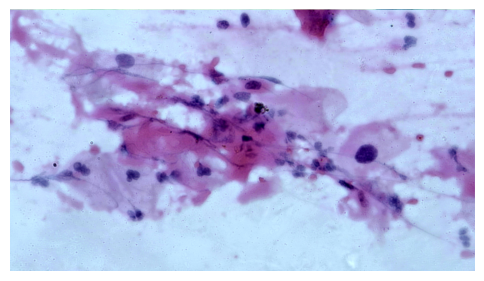

In [ ]:
img_path = '1.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(img)


### Chuyển ảnh màu thành xám và hiển thị

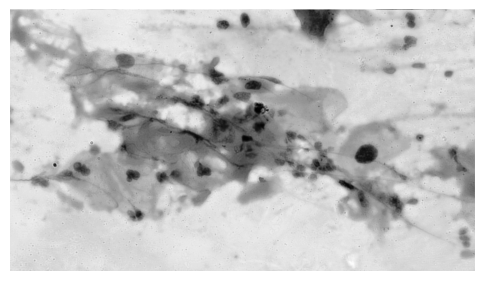

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(gray_img, cmap='gray')

#### Tăng cường độ sáng ảnh màu lên 50 đơn vị, và giảm cường độ sáng xuống 80 đơn vị ( Trên ảnh màu gốc ban đầu )

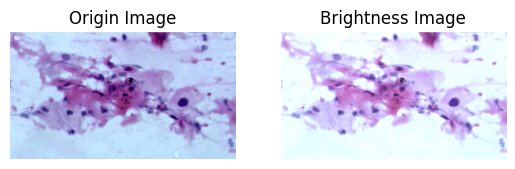

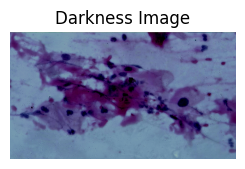

In [ ]:
new_bright_img = img.astype(np.float32) + 50
new_bright_img = np.clip(new_bright_img, 0, 255)
new_bright_img = new_bright_img.astype(np.uint8)

new_dark_img = img.astype(np.float32) - 80
new_dark_img = np.clip(new_dark_img, 0, 255)
new_dark_img = new_dark_img.astype(np.uint8)

# Hiển thị hình ảnh

plt.subplot(221)
plt.imshow(img)
plt.axis('off')
plt.title("Origin Image")

plt.subplot(222)
plt.axis('off')

plt.imshow(new_bright_img)
plt.title("Brightness Image")
plt.show()

plt.subplot(223)
plt.imshow(new_dark_img)
plt.axis('off')


plt.title("Darkness Image")
plt.axis('off')
plt.show()

### Gaussian Filter

In [ ]:
import math

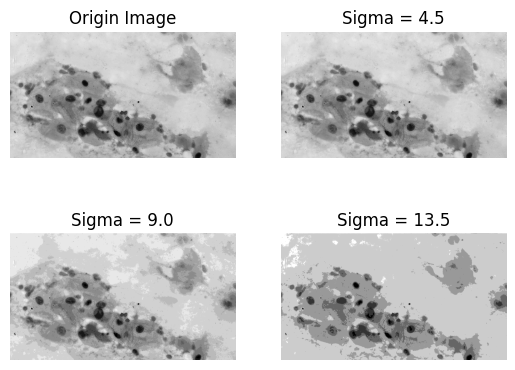

In [ ]:
def gaussian_kernel(size, sigma):
    if size % 2 == 0:
        size = size + 1

    max_point = size // 2  # both directions (x,y) maximum cell start point
    min_point = -max_point  # both directions (x,y) minimum cell start point

    K = np.zeros((size, size))  # kernel matrix

    for x in range(min_point, max_point + 1):
        for y in range(min_point, max_point + 1):
            value = (1 / (2 * math.pi * (sigma ** 2)) * math.exp((-(x ** 2 + y ** 2))
                                                             / (2 * (sigma ** 2))))
            K[x - min_point, y - min_point] = value

    return K

img_path = '10.jpg'
img = cv2.imread(img_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sigma = 0
index = 0
for _ in range(4):
  if(sigma == 0):
    img_gaussian = gray_img
  else:
    kernel = gaussian_kernel(5, sigma)
    img_gaussian = cv2.filter2D(gray_img, -1, kernel)

  plt.subplot(220 + index+1)
  plt.imshow(img_gaussian, cmap='gray')
  plt.axis('off')

  if sigma == 0:
    plt.title("Origin Image")
  else:
    plt.title(f"Sigma = {sigma}")
  index+=1
  sigma+=4.5


## Practice kernel CNN

In [ ]:
data = [
    [10, 2, -1, 4, 10],
    [1, 2, 0, 1, 15],
    [3, -4, 2.5, 1, -4],
    [2, 2, 1, 2, 3],
    [3, 3, 3, 0, 1]
]

# Convert the list to a numpy array
input = np.array(data)

kernal = [
    [1, 0 , 0],
    [2, 1, 0],
    [3, 4, 1]
]

kernal = np.array(kernal)

print(f'Input: \n {input}')
print(f'Kernal: \n {kernal}')

Input: 
 [[10.   2.  -1.   4.  10. ]
 [ 1.   2.   0.   1.  15. ]
 [ 3.  -4.   2.5  1.  -4. ]
 [ 2.   2.   1.   2.   3. ]
 [ 3.   3.   3.   0.   1. ]]
Kernal: 
 [[1 0 0]
 [2 1 0]
 [3 4 1]]


In [ ]:
def convolve(input, kernel, stride=1, padding=0):
  input_height, input_width = input.shape
  kernel_height, kernel_width = kernel.shape

  output_height = (input_height - kernel_height + 2 * padding) // stride + 1
  output_width = (input_width - kernel_width + 2 * padding) // stride + 1

  output = np.zeros((output_height, output_width))

  for y in range(output_height):
    for x in range(output_width):
      input_y_start = y * stride
      input_y_end = input_y_start + kernel_height
      input_x_start = x * stride
      input_x_end = input_x_start + kernel_width

      input_region = input[input_y_start:input_y_end, input_x_start:input_x_end]
      output[y, x] = np.sum(input_region * kernel)

  return output

In [ ]:
output = convolve(input, kernal)

print(f'Output: \n {output}')

Output: 
 [[ 9.5  5.   7.5]
 [18.   8.5 20. ]
 [33.  22.  16.5]]
